In [1]:
!ls

cases_meta.tsv	       gdc-client_v1.3.0_Ubuntu14.04_x64.zip  Lab 10.ipynb
file_case_id_DNA.csv   GDC.log				      live_miRNA
files.2018-10-18.json  gdc_manifest.2018-10-19.txt	      __MACOSX
files_meta.tsv	       GDCproject-yue-2			      miRNA_matrix.csv
gdc-client	       GDCproject-yue-2.zip


In [2]:
!python3 ./GDCproject-yue-2/src/predict.py

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[2018-10-22 20:56:49,079 - GDC - INFO] Percentage of tumor cases in training set is 0.8619631901840491
[2018-10-22 20:56:49,080 - GDC - INFO] Percentage of tumor cases in test set is 0.9071428571428571
[2018-10-22 20:56:51,735 - GDC - INFO] selected features are [88, 185, 186, 969, 1099, 1236]
[2018-10-22 20:56:54,992 - GDC - INFO] scores are {'LogisticRegression': [0.984251968503937, 0.9714285714285714, 0.984251968503937, 0.984251968503937, 0.8461538461538461], 'ExtraTreesClassifier': [0.9841269841269841, 0.9642857142857143, 0.9802371541501976, 0.9763779527559056, 0.8461538461538461], 'RandomForestClassifier': [0.9921259842519685, 0.9857142857142858, 0.9921259842519685, 0.9921259842519685, 0.9230769230769231], 'AdaBoostClassifier': [1.0, 0.9857142857142

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[2018-10-22 20:56:56,211 - GDC - INFO] Percentage of tumor cases in training set is 0.8619631901840491
[2018-10-22 20:56:56,212 - GDC - INFO] Percentage of tumor cases in test set is 0.9071428571428571
[2018-10-22 20:56:58,854 - GDC - INFO] selected features are [88, 185, 186, 969, 1099, 1236]
[2018-10-22 20:57:01,652 - GDC - INFO] scores are {'LogisticRegression': [0.984251968503937, 0.9714285714285714, 0.984251968503937, 0.984251968503937, 0.8461538461538461], 'ExtraTreesClassifier': [0.9841269841269841, 0.9642857142857143, 0.9802371541501976, 0.9763779527559056, 0.8461538461538461], 'RandomForestClassifier': [0.9921259842519685, 0.9857142857142858, 0.9921259842519685, 0.9921259842519685, 0.9230769230769231], 'AdaBoostClassifier': [1.0, 0.9857142857142

['LogisticRegression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'SVC']


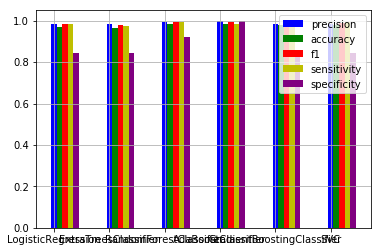

In [3]:
%matplotlib inline
%run ./GDCproject-yue-2/src/predict.py

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[2018-10-22 21:04:50,231 - GDC - INFO] Percentage of tumor cases in training set is 0.8619631901840491
[2018-10-22 21:04:50,231 - GDC - INFO] Percentage of tumor cases in test set is 0.9071428571428571
[2018-10-22 21:04:52,716 - GDC - INFO] selected features are [88, 185, 186, 969, 1099, 1236]
[2018-10-22 21:04:55,453 - GDC - INFO] scores are {'LogisticRegression': [0.984251968503937, 0.9714285714285714, 0.984251968503937, 0.984251968503937, 0.8461538461538461], 'ExtraTreesClassifier': [0.9841269841269841, 0.9642857142857143, 0.9802371541501976, 0.9763779527559056, 0.8461538461538461], 'RandomForestClassifier': [0.9921259842519685, 0.9857142857142858, 0.9921259842519685, 0.9921259842519685, 0.9230769230769231], 'AdaBoostClassifier': [1.0, 0.9857142857142

['LogisticRegression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'SVC']


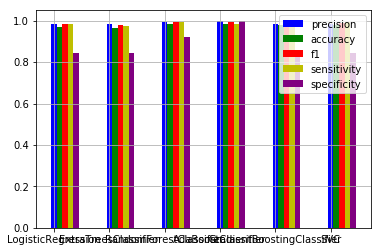

In [7]:
# %load ./GDCproject-yue-2/src/predict.py
# copyright: yueshi@usc.edu
import pandas as pd 
import hashlib
import os 
from utils import logger
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from utils import logger
#def lassoSelection(X,y,)

def lassoSelection(X_train, y_train, n):
    '''
    Lasso feature selection.  Select n features. 
    '''
    #lasso feature selection
    #print (X_train)
    clf = LassoCV()
    sfm = SelectFromModel(clf, threshold=0)
    sfm.fit(X_train, y_train)
    X_transform = sfm.transform(X_train)
    n_features = X_transform.shape[1]
    
    #print(n_features)
    while n_features > n:
        sfm.threshold += 0.01
        X_transform = sfm.transform(X_train)
        n_features = X_transform.shape[1]
    features = [index for index,value in enumerate(sfm.get_support()) if value == True  ]
    logger.info("selected features are {}".format(features))
    return features


def specificity_score(y_true, y_predict):
    '''
    true_negative rate
    '''
    true_negative = len([index for index,pair in enumerate(zip(y_true,y_predict)) if pair[0]==pair[1] and pair[0]==0 ])
    real_negative = len(y_true) - sum(y_true)
    return true_negative / real_negative 

def model_fit_predict(X_train,X_test,y_train,y_test):

    np.random.seed(2018)
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import precision_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    models = {
        'LogisticRegression': LogisticRegression(),
        'ExtraTreesClassifier': ExtraTreesClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'SVC': SVC()
    }
    tuned_parameters = {
        'LogisticRegression':{'C': [1, 10]},
        'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
        'RandomForestClassifier': { 'n_estimators': [16, 32] },
        'AdaBoostClassifier': { 'n_estimators': [16, 32] },
        'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
        'SVC': {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    }
    scores= {}
    for key in models:
        clf = GridSearchCV(models[key], tuned_parameters[key], scoring=None,  refit=True, cv=10)
        clf.fit(X_train,y_train)
        y_test_predict = clf.predict(X_test)
        precision = precision_score(y_test, y_test_predict)
        accuracy = accuracy_score(y_test, y_test_predict)
        f1 = f1_score(y_test, y_test_predict)
        recall = recall_score(y_test, y_test_predict)
        specificity = specificity_score(y_test, y_test_predict)
        scores[key] = [precision,accuracy,f1,recall,specificity]
    #print(scores)
    return scores



def draw(scores):
    '''
    draw scores.
    '''
    import matplotlib.pyplot as plt
    logger.info("scores are {}".format(scores))
    ax = plt.subplot(111)
    precisions = []
    accuracies =[]
    f1_scores = []
    recalls = []
    categories = []
    specificities = []
    N = len(scores)
    ind = np.arange(N)  # set the x locations for the groups
    width = 0.1        # the width of the bars
    for key in scores:
        categories.append(key)
        precisions.append(scores[key][0])
        accuracies.append(scores[key][1])
        f1_scores.append(scores[key][2])
        recalls.append(scores[key][3])
        specificities.append(scores[key][4])

    precision_bar = ax.bar(ind, precisions,width=0.1,color='b',align='center')
    accuracy_bar = ax.bar(ind+1*width, accuracies,width=0.1,color='g',align='center')
    f1_bar = ax.bar(ind+2*width, f1_scores,width=0.1,color='r',align='center')
    recall_bar = ax.bar(ind+3*width, recalls,width=0.1,color='y',align='center')
    specificity_bar = ax.bar(ind+4*width,specificities,width=0.1,color='purple',align='center')

    print(categories)
    ax.set_xticks(np.arange(N))
    ax.set_xticklabels(categories)
    ax.legend((precision_bar[0], accuracy_bar[0],f1_bar[0],recall_bar[0],specificity_bar[0]), ('precision', 'accuracy','f1','sensitivity','specificity'))
    ax.grid()
    plt.show()

if __name__ == '__main__':


    data_dir ="/home/ubuntu/Downloads/"

    data_file = data_dir + "miRNA_matrix.csv"

    df = pd.read_csv(data_file)
    # print(df)
    y_data = df.pop('label').values

    df.pop('file_id')

    columns =df.columns
    #print (columns)
    X_data = df.values
    
    # split the data to train and test set
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
    

    #standardize the data.
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # check the distribution of tumor and normal sampels in traing and test data set.
    logger.info("Percentage of tumor cases in training set is {}".format(sum(y_train)/len(y_train)))
    logger.info("Percentage of tumor cases in test set is {}".format(sum(y_test)/len(y_test)))
    
    n = 7
    feaures_columns = lassoSelection(X_train, y_train, n)



    scores = model_fit_predict(X_train[:,feaures_columns],X_test[:,feaures_columns],y_train,y_test)

    draw(scores)
    #lasso cross validation
    # lassoreg = Lasso(random_state=0)
    # alphas = np.logspace(-4, -0.5, 30)
    # tuned_parameters = [{'alpha': alphas}]
    # n_fold = 10
    # clf = GridSearchCV(lassoreg,tuned_parameters,cv=10, refit = False)
    # clf.fit(X_train,y_train)

In [153]:
import os 
from utils import logger
import pandas as pd 
import numpy as np

data_dir ="/home/ubuntu/Downloads/"

data_file = data_dir + "miRNA_matrix.csv"

df = pd.read_csv(data_file)

df.head()

,file_id,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,label
0,832a42f9-7d5c-4e96-a3dc-b0f5b639f57b,17572,17220,17441,7705,10837,419,1059,5389,5493,...,22,0,1,4,0,2,53,10375,16539,1
1,297b6213-92d1-4853-9621-160b3f10387b,165291,163691,166109,312520,4924,8550,10485,35179,36132,...,28,1,0,158,0,1120,608,1996,260408,1
2,313c0dc6-2c2a-4fe9-8892-84ccefbf3933,18781,19052,19239,5978,1061,483,2319,9276,10204,...,31,0,4,8,0,0,63,317,32436,1
3,be701183-6b9f-44eb-b83a-6372b2b50054,38527,38653,39191,34212,23785,1944,2703,17532,18433,...,17,0,4,21,0,3,135,9676,43145,0
4,b04a810e-df55-42c7-954a-d61c6a2d4d3d,121820,121939,122897,69532,38072,2672,11172,120223,123415,...,20,0,7,42,0,5,405,6039,61188,0


In [154]:
from sklearn.model_selection import train_test_split
y_data = df.pop('label').values
df.pop('file_id')
columns = df.columns
X_data = df.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [156]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipe_knn = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski'))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [157]:
# check the distribution of tumor and normal sampels in traing and test data set.
logger.info("Percentage of tumor cases in training set is {}".format(sum(y_train)/len(y_train)))
logger.info("Percentage of tumor cases in test set is {}".format(sum(y_test)/len(y_test)))

from sklearn.metrics import classification_report

print('k=5 Nearest Neighbors: \n', classification_report( y_true=y_test, y_pred=y_pred))


[2018-10-22 22:37:28,977 - GDC - INFO] Percentage of tumor cases in training set is 0.8619631901840491
[2018-10-22 22:37:28,979 - GDC - INFO] Percentage of tumor cases in test set is 0.9071428571428571


k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.82      0.69      0.75        13
          1       0.97      0.98      0.98       127

avg / total       0.95      0.96      0.96       140



[[  9   4]
 [  2 125]]


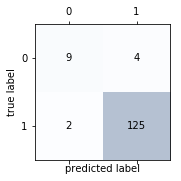

In [160]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

confmat = confusion_matrix(y_test, y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) 

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]): 
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

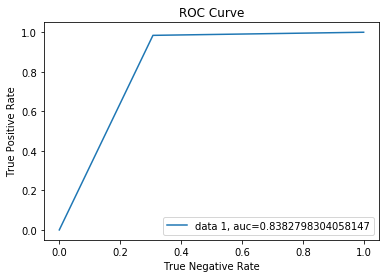

In [152]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('ROC Curve')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()